# Import modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Lấy dataset

In [2]:
df=pd.read_csv("../data/BostonHousingData.csv")
df = df.dropna()
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


# Hiển thị dataset

<AxesSubplot:>

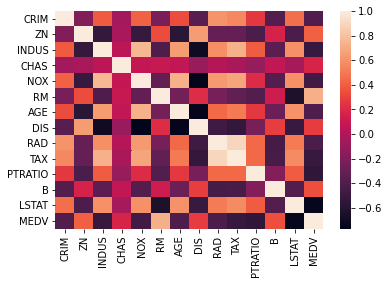

In [4]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Tạo model
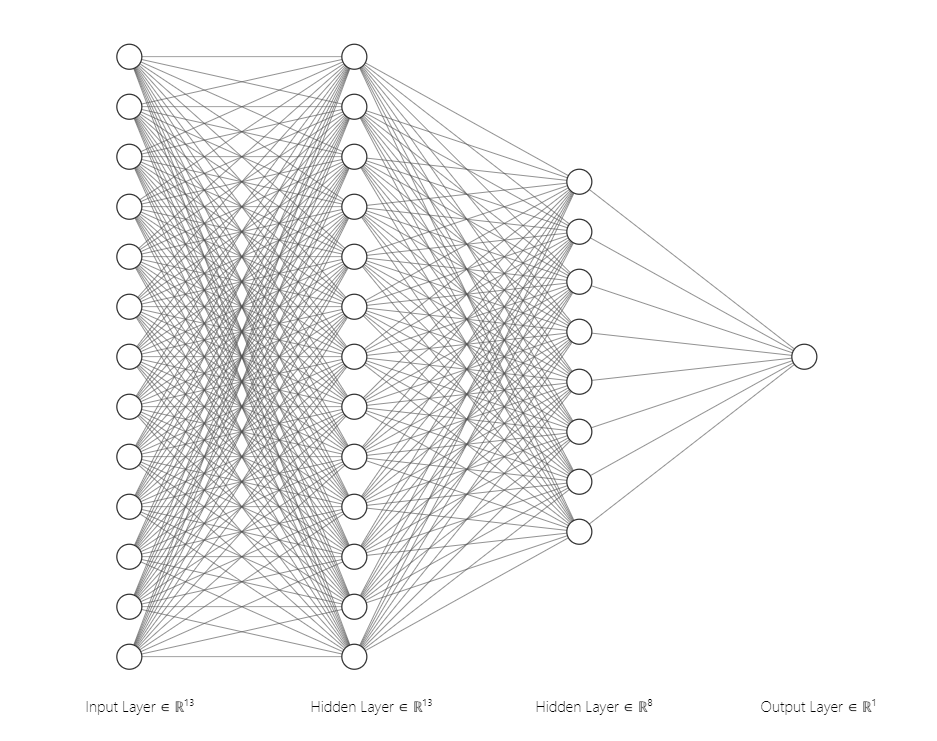

In [5]:
model = Sequential(name = 'Ex-Regression')
model.add(Dense(13, input_shape=(13,), activation='relu')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "Ex-Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


# Tách X, Y

In [6]:
X=np.asarray(df.drop("MEDV",axis=1))
Y=np.asarray(df["MEDV"])

# Train-test split, scale

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Train 

In [8]:
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size = 10) 

Epoch 1/100
32/32 [==============================] - 3s 9ms/step - loss: 577.9169
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 564.0050
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 540.7005
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 512.2129
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 471.2286
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 413.4288
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 344.7760
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 275.8671
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 214.5927
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 170.3585
Epoch 11/100
32/32 [==============================] - 0s 9ms/step - loss: 142.0078
Epoch 12/100
32/32 [==============================] - 0s 9ms/step - loss: 126.9612
Epoch 13/100

32/32 [==============================] - 0s 9ms/step - loss: 20.4869


# Plot history

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Đánh giá

In [ ]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)

In [ ]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Nuber of record')
plt.ylabel('MEDV')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,prediction))
train_prediction = model.predict(X_train)
print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

In [ ]:
# Tính loss:
model.evaluate(X_test, y_test)